In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
% matplotlib inline

#### 1-1. $\int_0^1 \dots \int_0^1 \prod_{k=1}^{19} \exp(\sqrt{\cos x_k + k^2 \sin x_{k+1}}) dx_1\dots dx_{20}$

In [10]:
max_iter = 10000
integral = 0
for i in range(max_iter):
    vec_x = np.random.uniform(0,1,20)
    product = 1
    for j in range(19):
        product = product*np.exp(np.sqrt(np.cos(vec_x[j])+((j+1)**2)*np.sin(vec_x[j+1])))
    integral += product
print(integral/max_iter)

5.51774536156395e+64


#### 1-2. $\int_{0}^{100}(cos\, x)e^{-50x^{2}}$

In [11]:
def func(x):
    return np.cos(x)*np.exp(-50*(x**2))

s = 0
max_iter = 1000000
for _ in range(max_iter):
    rn = np.random.uniform(0,100)
    s+=(func(rn))
print("estimate:", 100*s/max_iter)

estimate: 0.12452655322909195


In [12]:
# answer 
from scipy import integrate
f = lambda x: np.cos(x)*np.exp(-50*(x**2))
y, error = integrate.quad(f, 0, 100)
print("answer:", y)

answer: 0.12470632069775339


#### 1-3 $\int_0^{100} (\cos{x}) e^{-50x^{2.01}}dx$

In [14]:
def f(x):
    return (np.cos(x)*np.exp(-50*x**2.01))

In [17]:
s = 0
max_iter = 100000
for _ in range(max_iter):
    vec_x = np.random.uniform(0,100)
    product = f(vec_x)
    s += product
print("estimate:", 100*s/max_iter)

estimate: 0.1276769939916754


In [22]:
# answer
from scipy.integrate import quad
answer = quad(lambda x: f(x), 0, 100)[0]
print("answer:", answer)

answer: 0.125905663027547


#### 2-1. estimate p(x>8) from N(0,1)

$P(x>8) = \int_{8}^{\infty }\frac{1}{\sqrt{2\pi }}e^{\frac{-x^{2}} {2}}dx
=\int_{8}^{\infty }\frac{1}{\sqrt{2\pi }}e^{\frac {-(x-8)^{2}}{2}}e^{-8x+32}dx$

In [13]:
s = []
for _ in range(1000):
    n = np.random.normal(0,1)
    s.append(n>8)
np.mean(s)

0.0

In [23]:
s = 0
num = 10000
for _ in range(num):
    n = np.random.normal(8,1) # sample from N(8,1)
    if n>8:
        output = np.exp(-8*n+32)
        s += (output)
print("estimate:",s/num)

estimate: 6.184585576717975e-16


In [24]:
# answer 
answer =1 - stats.norm().cdf(8)
print("answer", answer)

answer 6.661338147750939e-16


#### example for x>5 from N(0,1)

In [27]:
# Using importance sampling
n = 10000
y = stats.expon(loc=5).rvs(n)
h_is = 1.0/n * np.sum(stats.norm().pdf(y)/stats.expon(loc=5).pdf(y))
# estimate and relative error
h_is, np.abs(h_is- h_true)/h_true

(2.8563759640716087e-07, 0.003537310155217964)

In [28]:
h_true =1 - stats.norm().cdf(5)
h_true

2.866515719235352e-07

reference: https://people.duke.edu/~ccc14/sta-663/MonteCarlo.html

#### 3. bivariate normal distribution

In [34]:
sample_counts = 10000
X = []
Y = []
for _ in range(sample_counts):    
    w = np.random.uniform(0,1)
    u = np.random.uniform(0,1)
    x = np.sqrt(-2*np.log(1-w))*np.cos(2*np.pi*u)
    y = np.sqrt(-2*np.log(1-w))*np.sin(2*np.pi*u)
    X.append(x)
    Y.append(y)

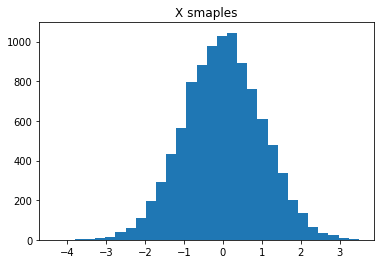

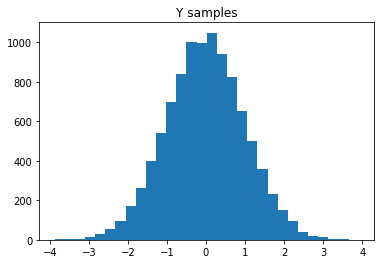

In [35]:
plt.hist(X, bins=30)
plt.title("X smaples")
plt.show()
plt.hist(Y, bins=30)
plt.title("Y samples")
plt.show()

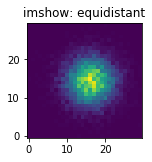

In [40]:
H, xedges, yedges = np.histogram2d(Y, X, bins=30)

fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot(131)
ax.set_title('imshow: equidistant')
im = plt.imshow(H, interpolation='nearest', origin='low')